In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:41791")
client

<Client: 'tcp://127.0.0.1:41791' processes=8 threads=40, memory=157.35 GiB>

In [24]:
import numpy as np
import xarray as xr
import pandas as pd

import os.path as op

from xgcm.grid import Grid
from MITgcmutils import rdmds
from xmitgcm import open_mdsdataset

import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
cdir = '/tank/chaocean/qjamet/RUNS/ORAR/reruns2/'
cgdir = '/tank/chaocean/grid_chaO/gridMIT_update1/'
sdir = '/tank/spectre/RUNS/'

# Read $1/12^\circ$ Chaocean

In [4]:
iiter = 1419120

ds = open_mdsdataset(op.join(cdir,'ensm/run1967/ocn'), 
                     grid_dir=cgdir,
                     prefix=['snap_diagOcn'], delta_t=2e2,
                     iters=iiter, 
                    )
ds

<xarray.Dataset>
Dimensions:  (time: 1, XC: 1000, YC: 900, XG: 1000, YG: 900, Z: 46, Zp1: 47,
              Zu: 46, Zl: 46)
Coordinates: (12/33)
    iter     (time) int64 1419120
  * time     (time) timedelta64[ns] 3285 days
  * XC       (XC) >f4 262.0 262.1 262.2 262.3 262.3 ... 347.7 347.8 347.9 348.0
  * YC       (YC) >f4 -19.92 -19.83 -19.75 -19.67 ... 54.75 54.83 54.92 55.0
  * XG       (XG) >f4 262.0 262.0 262.1 262.2 262.3 ... 347.7 347.8 347.8 347.9
  * YG       (YG) >f4 -19.96 -19.87 -19.79 -19.71 ... 54.71 54.79 54.88 54.96
    ...       ...
    maskW    (Z, YC, XG) bool dask.array<chunksize=(46, 900, 1000), meta=np.ndarray>
    maskS    (Z, YG, XC) bool dask.array<chunksize=(46, 900, 1000), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(900, 1000), meta=np.ndarray>
    rhoRef   (Z) >f4 1.021e+03 1.021e+03 1.021e+03 ... 1.044e+03 1.044e+03
    maskInW  (YC, XG) bool dask.array<chunksize=(900, 1000), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(900, 1000), meta=np.ndarray>
Data variables:
    THETA    (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 46, 900, 1000), meta=np.ndarray>
    SALT     (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 46, 900, 1000), meta=np.ndarray>
    UVEL     (time, Z, YC, XG) >f4 dask.array<chunksize=(1, 46, 900, 1000), meta=np.ndarray>
    VVEL     (time, Z, YG, XC) >f4 dask.array<chunksize=(1, 46, 900, 1000), meta=np.ndarray>
    WVEL     (time, Zl, YC, XC) >f4 dask.array<chunksize=(1, 46, 900, 1000), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir='/tank/chaocea...

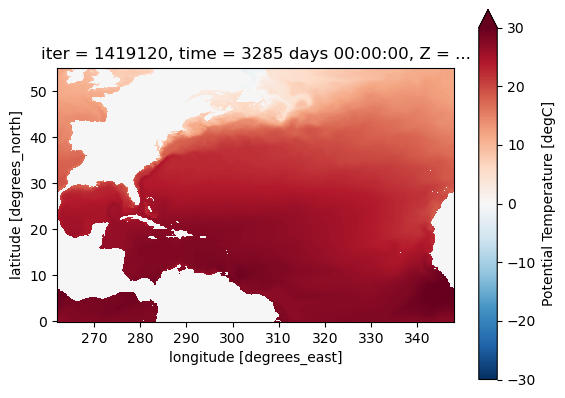

In [7]:
fig, ax = plt.subplots()
ds.THETA.isel(time=0,Z=0).sel(YC=slice(0,None)).plot(ax=ax, rasterized=True, vmax=30)
ax.set_aspect(True)

# Read $1/50^\circ$ Spectre

In [15]:
#-- some parameters --
nt = 73         #also need earlier and past year for interpolation, 
                #for now it is coded in a 'normal year' fashion
# nproc = 36      #number of processors used for parallelization 

#-- time param for loading --
dt = 80                #1/12 model time step
spy = 86400*365
dump = 5*86400       #5-d dumps
d_iter = dump/dt
nDump = spy/dump

iper = 2003
offset = int((iper-2002)*spy/dt)
# iters = np.arange(d_iter, (nDump+1)*d_iter, d_iter, dtype='int') + offset
iters = (np.arange(d_iter, (nDump+1)*d_iter, d_iter, dtype='int') 
         + offset) 
# - int(d_iter)
dd = 0
iters[dd:]

array([399600, 405000, 410400, 415800, 421200, 426600, 432000, 437400,
       442800, 448200, 453600, 459000, 464400, 469800, 475200, 480600,
       486000, 491400, 496800, 502200, 507600, 513000, 518400, 523800,
       529200, 534600, 540000, 545400, 550800, 556200, 561600, 567000,
       572400, 577800, 583200, 588600, 594000, 599400, 604800, 610200,
       615600, 621000, 626400, 631800, 637200, 642600, 648000, 653400,
       658800, 664200, 669600, 675000, 680400, 685800, 691200, 696600,
       702000, 707400, 712800, 718200, 723600, 729000, 734400, 739800,
       745200, 750600, 756000, 761400, 766800, 772200, 777600, 783000,
       788400])

### Grid file

In [16]:
md = 14
dsg = open_mdsdataset(op.join(sdir,'%04d/memb%03d/00' % (iper,md)), 
                      grid_dir=op.join(sdir,'grid'),
                      prefix=[], 
                      delta_t=dt , iters=iters[0]                              
                     )
dsg

/tank/spectre/tuchida/envs/spec/lib/python3.9/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in /tank/spectre/RUNS/2003/memb014/00 or /tank/spectre/RUNS/grid. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


<xarray.Dataset>
Dimensions:  (time: 1, XC: 2052, YC: 1000, XG: 2052, YG: 1000, Z: 75, Zp1: 76,
              Zu: 75, Zl: 75)
Coordinates: (12/33)
    iter     (time) int64 399600
  * time     (time) timedelta64[ns] 370 days
  * XC       (XC) >f4 278.4 278.4 278.5 278.5 278.5 ... 319.4 319.4 319.4 319.4
  * YC       (YC) >f4 25.51 25.53 25.55 25.57 25.59 ... 45.43 45.45 45.47 45.49
  * XG       (XG) >f4 278.4 278.4 278.4 278.5 278.5 ... 319.4 319.4 319.4 319.4
  * YG       (YG) >f4 25.5 25.52 25.54 25.56 25.58 ... 45.42 45.44 45.46 45.48
    ...       ...
    maskW    (Z, YC, XG) bool dask.array<chunksize=(75, 1000, 2052), meta=np.ndarray>
    maskS    (Z, YG, XC) bool dask.array<chunksize=(75, 1000, 2052), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(1000, 2052), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(1000, 2052), meta=np.ndarray>
    maskInW  (YC, XG) bool dask.array<chunksize=(1000, 2052), meta=np.ndarray>
    rhoRef   (Z) >f4 1.021e+03 1.021e+03 1.021e+03 ... 1.044e+03 1.045e+03
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir='/tank/spectre...

## From double-precision pickup files

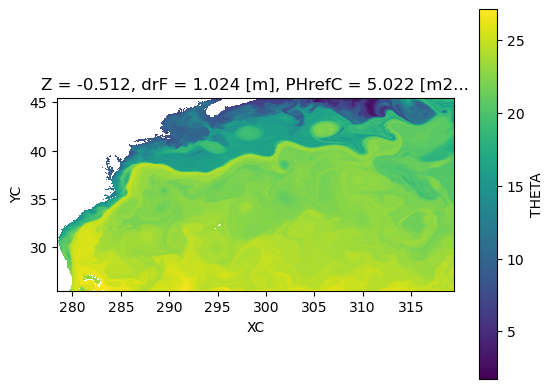

0


In [25]:
ii = 399600

for md in range(1):
    fname0 = op.join(sdir,'%4d/memb%03d/%02d/pickup.%010i' 
                                % (iper,md,0,ii) 
                    )
    fname1 = op.join(sdir,'%4d/memb%03d/%02d/pickup.%010i' 
                                % (iper,md,1,ii) 
                    )
    fname2 = op.join(sdir,'%4d/memb%03d/%02d/pickup.%010i' 
                                % (iper,md,2,ii) 
                    )
    fname3 = op.join(sdir,'%4d/memb%03d/%02d/pickup.%010i' 
                                % (iper,md,3,ii) 
                    )
    if op.isfile(fname0+'.data'):
        tmpocn = rdmds( fname0 )
    elif op.isfile(fname1+'.data'):
        tmpocn = rdmds( fname1 )
    elif op.isfile(fname2+'.data'):
        tmpocn = rdmds( fname2 )
    elif op.isfile(fname3+'.data'):
        tmpocn = rdmds( fname3 )
    else:
        raise ValueError("!!!FILE MISSING!!!")
        break
        
    dsave = xr.DataArray(tmpocn[:75].astype(np.float32), dims=['Z','YC','XG'], 
                         coords={'Z':dsg.Z.data,'YC':dsg.YC.data,'XG':dsg.XG.data}
                        ).chunk({'Z':5,'YC':100,'XG':100}).to_dataset(name='UVEL')
    dsave['VVEL'] = xr.DataArray(tmpocn[75:150].astype(np.float32), dims=['Z','YG','XC'], 
                                 coords={'Z':dsg.Z.data,'YG':dsg.YG.data,'XC':dsg.XC.data}
                                        ).chunk({'Z':5,'YG':100,'XC':100})
    dsave['THETA'] = xr.DataArray(tmpocn[150:225].astype(np.float32), dims=['Z','YC','XC'], 
                                 coords={'Z':dsg.Z.data,'YC':dsg.YC.data,'XC':dsg.XC.data}
                                        ).chunk({'Z':5,'YC':100,'XC':100})
    dsave['SALT'] = xr.DataArray(tmpocn[225:300].astype(np.float32), dims=['Z','YC','XC'], 
                                 coords={'Z':dsg.Z.data,'YC':dsg.YC.data,'XC':dsg.XC.data}
                                        ).chunk({'Z':5,'YC':100,'XC':100})
    
    fig, ax = plt.subplots()
    dsave.THETA.where(dsg.maskC!=0.).isel(Z=0).plot(ax=ax, rasterized=True)
    ax.set_aspect('equal')
    plt.show()
    dsave.close()
    del tmpocn
    print(md)

## Zarrified single precision outputs

In [29]:
dsz = xr.open_zarr(op.join(sdir,'%4d/memb%03d/Snap%010i.zarr' 
                           % (iper,0,ii))
                  )
dsz

<xarray.Dataset>
Dimensions:  (Z: 75, YC: 1000, XC: 2052, XG: 2052, YG: 1000)
Coordinates:
  * XC       (XC) float32 278.4 278.4 278.5 278.5 ... 319.4 319.4 319.4 319.4
  * XG       (XG) float32 278.4 278.4 278.4 278.5 ... 319.4 319.4 319.4 319.4
  * YC       (YC) float32 25.51 25.53 25.55 25.57 ... 45.43 45.45 45.47 45.49
  * YG       (YG) float32 25.5 25.52 25.54 25.56 ... 45.42 45.44 45.46 45.48
  * Z        (Z) float32 -0.512 -1.564 -2.677 ... -5.698e+03 -5.902e+03
Data variables:
    SALT     (Z, YC, XC) float32 dask.array<chunksize=(5, 100, 100), meta=np.ndarray>
    THETA    (Z, YC, XC) float32 dask.array<chunksize=(5, 100, 100), meta=np.ndarray>
    UVEL     (Z, YC, XG) float32 dask.array<chunksize=(5, 100, 100), meta=np.ndarray>
    VVEL     (Z, YG, XC) float32 dask.array<chunksize=(5, 100, 100), meta=np.ndarray>

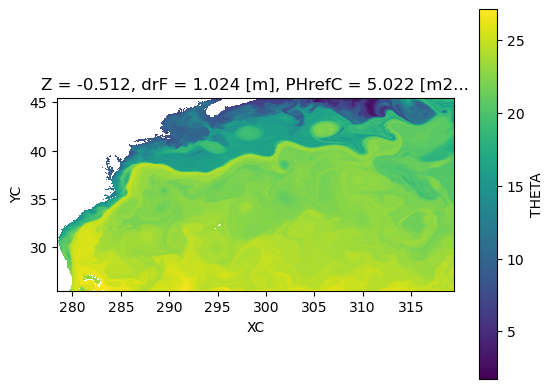

In [30]:
fig, ax = plt.subplots()
dsz.THETA.where(dsg.maskC!=0.).isel(Z=0).plot(rasterized=True)
ax.set_aspect('equal')